<a href="https://colab.research.google.com/github/andytamtran/Test/blob/main/Andy_lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

print (df)

Mounted at /content/gdrive
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA           

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [3]:
df['order_id'] = pd.to_numeric(df['order_id'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

df['customer_name'] = df['customer_name'].astype('category')
df['city'] = df['city'].astype('category')
df['state_province'] = df['state_province'].astype('category')
df['product_name'] = df['product_name'].astype('category')
df['product_line'] = df['product_line'].astype('category')

In [4]:
print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2           

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [5]:
df['complete_customer_info'] = (df['customer_name'].notnull() &
                                 df['city'].notnull() &
                                 df['state_province'].notnull() &
                                 (df['quantity'] > 0) &
                                 df['product_name'].notnull() &
                                 (df['product_price'] > 0))

df['complete_customer_info'] = df['complete_customer_info'].astype(int)


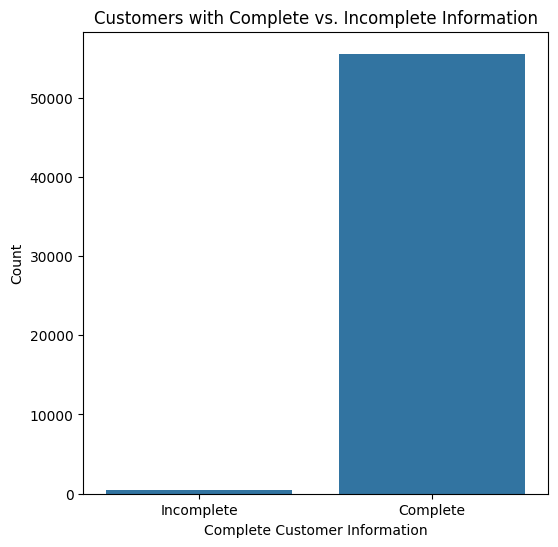

In [6]:
plt.figure(figsize=(6, 6))
sns.countplot(x='complete_customer_info', data=df)
plt.title('Customers with Complete vs. Incomplete Information')
plt.xlabel('Complete Customer Information')
plt.ylabel('Count')
plt.xticks([0, 1], ['Incomplete', 'Complete'])
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [7]:


def get_season(month):
    if month in ['01', '02', '12']:
        return 'Winter'
    elif month in ['03', '04', '05']:
        return 'Spring'
    elif month in ['06', '07', '08']:
        return 'Summer'
    elif month in ['09', '10', '11']:
        return 'Fall'
    else:
        return 'Fall'

df['total_amount'] = df['quantity'] * df['product_price']

df['month'] = df['order_date'].str[-5:-3]
df['season'] = df['month'].apply(get_season)

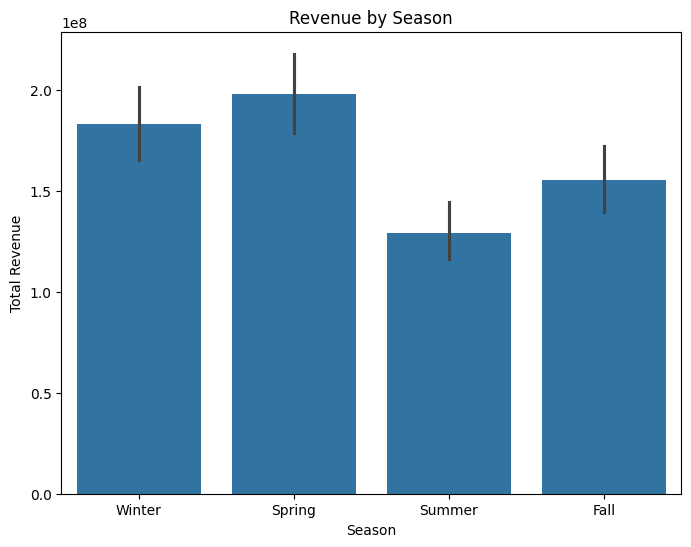

In [8]:
#Revvenue by season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='total_amount', data=df, estimator=sum, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

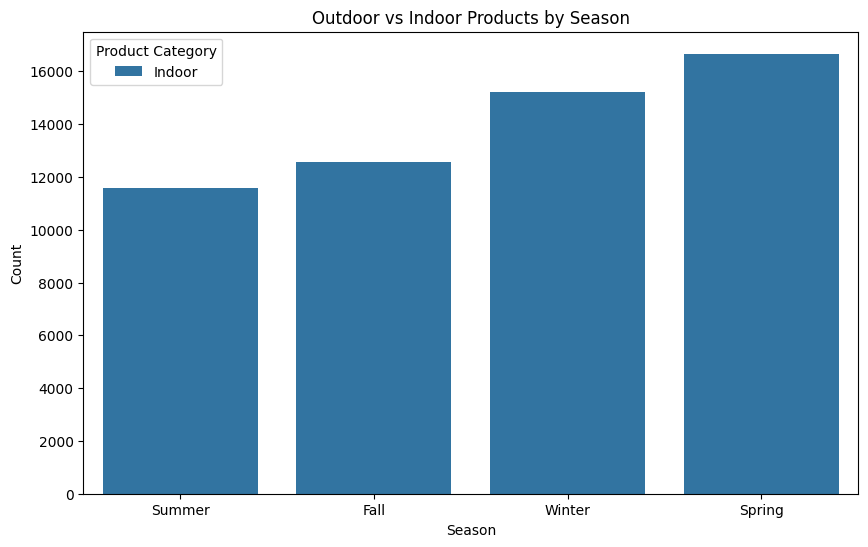

In [9]:
def categorize_product_line(product_line):
    outdoor_product_lines = ['Outdoor', 'Garden', 'Sports']
    if product_line in outdoor_product_lines:
        return 'Outdoor'
    else:
        return 'Indoor'

df['product_category'] = df['product_line'].apply(categorize_product_line)

plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='product_category', data=df)
plt.title('Outdoor vs Indoor Products by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()